## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Import data
df = pd.read_csv('ab_data.csv')

# Display the top rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Number of rows in the dataset
df_len = len(df)

print(df_len)

294478


c. The number of unique users in the dataset.

In [4]:
# Unique number of users
len(df.user_id.unique())

290584

d. The proportion of users converted.

In [5]:
# Proportion of users converted
df.converted.sum()/df_len

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Number of instances where control/treatment doesn't line up with old/new pages respectively
df_treatment_old = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
df_control_new = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

# Add lengths
misaligned = len(df_treatment_old) + len(df_control_new)

# Create a dataframe from it
misaligned_df = pd.concat([df_treatment_old, df_control_new])

misaligned

3893

f. Do any of the rows have missing values?

In [7]:
# Check for missing values
df.isnull().any().any()

False

**No missing values in the dataframe**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Create a new dataframe
df2 = df

# Remove misaligned rows
df2 = df2.drop(misaligned_df.index)

In [9]:
# Check that all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Number of unique user_ids
len(df2.user_id.unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Number of user_ids repeated
print("Repeated users = ", len(df2) - len(df2.user_id.unique()))

# Find duplicate user
df2[df2.duplicated('user_id')]

Repeated users =  1


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
# Find repeat user_id information
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Drop one row with the duplicate user_id
df2.drop(labels = 2893, axis = 0, inplace = True)

In [14]:
# Check dataframe for duplicate user_id
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# Probability of individual user converting
print("Probability of individual user converting is", df2.converted.mean())

Probability of individual user converting is 0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# Probability of control group converting
print("Probability of control group converting is", 
      df2[df2['group']=='control']['converted'].mean())

Probability of control group converting is 0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# Probability of treatment group converting
print("Probability of treatment group converting is", 
      df2[df2['group']=='treatment']['converted'].mean())

Probability of treatment group converting is 0.118808065515


d. What is the probability that an individual received the new page?

In [18]:
# Probability an individual received new page
print("Probability an individual recieved new page is", 
      df2['landing_page'].value_counts()[0]/len(df2))

Probability an individual recieved new page is 0.500061944223


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

 - In summary, the analysis used a dataset with 290,584 rows. 
 - 50% of the participants were provided with the new page (the treatment group), and the other 50% kept the old page (the control group). 
 - In the control group, the data showed a conversion rate of only 12%. 
 - In the treatment group, a lower conversion rate was recorded at 11.88%. 
 - However, the magnitude of this change is minimal with a difference of 0.16%.
 - These results are not encouraging for the conversion rate of the new page. 
 - In conclusion, if the probability of receiving a new page is higher, relative to the old page then the rate of conversion would naturally increase.
 - Therefore it is my recommendation to gather more data for a longer period of time to reduce bias.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- **Null-hypothesis**

$H_0:  p_{new} - p_{old} \leq 0$ 

*i.e.* The null hypothesis is, the difference between the conversion rate of users given the new page and the users given the old page will be equal to zero (same conversion rate) or lower than zero (the old page has a higher user conversion rate).

- **Alternative-hypothesis**

$H_1: p_{new} - p_{old} > 0$

*i.e.* The alternative hypothesis is, the difference between the conversion rate of users given the new page and the users given the old page will be greater than zero (the new page has a higher user conversion rate).



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

**Assumption** - $p_{new} = p_{old}$ <br>
Therefore average of the real $p_{new}$ and $p_{old}$ is $p_{mean}$

In [19]:
# Probability of conversion for new page
p_new = df2[df2['landing_page']=='new_page']['converted'].mean()

print("Probability of conversion for new page (p_new) is", p_new)

Probability of conversion for new page (p_new) is 0.118808065515


In [20]:
# Probability of conversion for old page
p_old = df2[df2['landing_page']=='old_page']['converted'].mean()

print("Probability of conversion for old page (p_old) is", p_old)

Probability of conversion for old page (p_old) is 0.1203863045


a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
# Mean of p_new and p_old
p_mean = np.mean([p_new, p_old])

print("Probability of conversion according to null hypothesis (p_mean) is",
      p_mean)

Probability of conversion according to null hypothesis (p_mean) is 0.119597185008


**According to Null hypothesis** <br>
$p_{mean} = p_{old} = p_{new} = 0.1196$ <br><br>
Therefore <br>
$p_{old} - p_{new} = 0$

b. What is the **convert rate** for $p_{old}$ under the null? <br>

$p_{mean} = p_{old} = p_{new} = 0.1196$ <br>


In [22]:
# Calculate n_new and n_old
n_new, n_old = df2['landing_page'].value_counts()

c. What is $n_{new}$?

In [23]:
print("number of tests with new page are", n_new)

number of tests with new page are 145310


d. What is $n_{old}$?

In [24]:
print("number of tests with old page are", n_old)

number of tests with old page are 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# Simulate conversion rates
new_page_converted = np.random.normal(0, p_new, n_new)

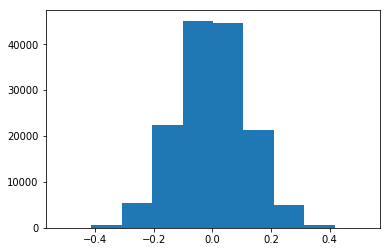

In [26]:
# Plot histogram to check the distribution
plt.hist(new_page_converted);

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
# Simulate conversion rates
old_page_converted = np.random.normal(0, p_old, n_old)

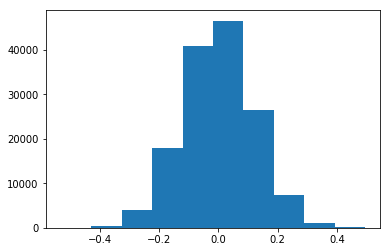

In [28]:
# Plot histogram to check distribution
plt.hist(old_page_converted);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
# Difference in p according to the null hypothesis
new_page_converted.mean() - old_page_converted.mean()

-0.00056634154359946789

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [30]:
# Import tqdm
from tqdm import *

p_diffs = []

# Re-run simulation 10,000 times
# trange creates an estimate for how long this program will take to run
for i in trange(10000):
    new_page_converted = np.random.choice([1, 0], size = n_new, p = [p_mean, (1 - p_mean)])
    old_page_converted = np.random.choice([1, 0], size = n_old, p = [p_mean, (1 - p_mean)])
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)

100%|██████████| 10000/10000 [01:17<00:00, 129.38it/s]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

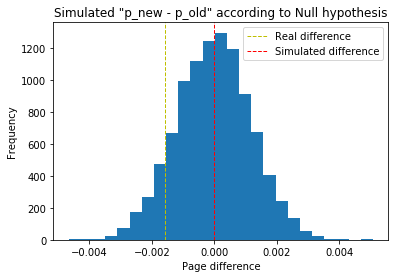

In [31]:
# Plot histogram
plt.hist(p_diffs, bins=25)
plt.title('Simulated "p_new - p_old" according to Null hypothesis')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x = (p_new-p_old), color = 'y', linestyle = 'dashed', linewidth = 1, label = "Real difference")
plt.axvline(x = (np.array(p_diffs).mean()), color = 'r', linestyle = 'dashed', linewidth = 1, label = "Simulated difference")
plt.legend()
plt.show()

**Inference** <br>
The simulated data creates a histogram with a normal distribution, with a mean of 0. This is how the data looks according to the Null hypothesis.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
# Difference in probability of conversion for new and old page 
# (not under null hypothesis)
p_diff = p_new - p_old

In [33]:
# Proportion of p_diffs greater than the actual difference
greater_than_diff = [i for i in p_diffs if i > p_diff]

In [34]:
# Calculate values
print("Actual difference is" , p_diff)

p_greater_than_diff = len(greater_than_diff) / len(p_diffs)

print('Proportion greater than actual difference is', p_greater_than_diff)

print('That is {}%'.format(p_greater_than_diff*100))

Actual difference is -0.00157823898536
Proportion greater than actual difference is 0.9013
That is 90.13%


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- Type 1 error rate (α) = 0.05
- The value from the calculation is the p-value, which is 0.901.
- The observed difference in our dataset is only higher than ~10% of the simulated difference assuming both pages are the same, which is not significant.
- By comparing p-value to type I error threshold (α), we can make a decision to either reject or fail to reject the null hypothesis.
- Since the p-value is greater than our error rate of 0.05, we fail to reject the null hypothesis.
- This suggests that the new page does not do significantly better than the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
# Import statsmodels
import statsmodels.api as sm

# Calculate number of conversions
# n_old and n_new were defined ealier

convert_old = len(df2[(df2['landing_page'] == 'old_page')&(df2['converted'] == 1)])
convert_new = len(df2[(df2['landing_page'] == 'new_page')&(df2['converted'] == 1)])

print("convert_old = ", convert_old, 
      "\nconvert_new = ", convert_new,
      "\nn_old = ", n_old,
      "\nn_new = ", n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_old =  17489 
convert_new =  17264 
n_old =  145274 
n_new =  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
# Find z-score and p-value
z_score, p_value = sm.stats.proportions_ztest(count = [convert_new, convert_old], 
                                              nobs = [n_new, n_old], value = 0.0,
                                             alternative = 'larger')
print("z-score = ", z_score,
     "\np-value = ", p_value)

z-score =  -1.31092419842 
p-value =  0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- It would seem that the differences between the lines shown in the histogram above is -1.31 standard deviations (z-score).
- The p-value is about 0.905 which is the probability that this result is due to random chance.
- This is not enough evidence to reject the null hypothesis and thus we fail to do so.
- The p-value is almost similar to the value calculated in part **j**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

 - Since the outcome variable, although represented numerically, is abinary variable, it is a classification.
 - Logistic Regression can be performed.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page, a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for, which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is, 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
# Clone dataframe 
df3 = df2

In [39]:
# Create and populate 'intercept' and 'ab_page' columns with zeros (control group)
df3['intercept'] = pd.Series(np.zeros(len(df3)), index = df3.index)
df3['ab_page'] = pd.Series(np.zeros(len(df3)), index = df3.index)

In [40]:
# Find indexes that need to be changed for treatment group
index_to_change = df3[df3['group'] == 'treatment'].index

# Change values in 'intercept' and 'ab_page' columns to 1 for treatment group
df3.set_value(index = index_to_change, col = 'ab_page', value = 1)
df3.set_value(index = df3.index, col = 'intercept', value = 1)

# Change datatype
df3[['intercept', 'ab_page']] = df3[['intercept', 'ab_page']].astype(int)

# Make "converted" column the last column in the dataframe 
df3 = df3[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]

In [41]:
# Check the dataframe
df3[df3['group'] == 'treatment'].head()

,user_id,timestamp,group,landing_page,ab_page,intercept,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [42]:
# Create a regressor model
regressor = sm.Logit(df3['converted'], df3[['ab_page', 'intercept']])

# Calculate results
result = regressor.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 12 Apr 2018   Pseudo R-squ.:               8.077e-06
Time:                        22:08:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- The p-value associated with ab_page is 0.190, which is marginally higher (by 0.001) than the p-value calculated using the z-test above, which was 0.189.
- The reason why the value is different in the linear regression model -  the alternative is whether p_new and p_old are not equal; whereas in the previous part the alternative hypothesis was that (p_new - p_old) > 0.
- Hence, we should expect to get different p-values as these are different hypothesis tests.
- However, this p-value is still much too high to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- There are certainly disadvantages to adding too many factors into your analysis.
- You want to have features which have large impacts on outcome. Small impacts are usually not influential and may just add to the noise.
- In conclusion, only one feature was chosen to determine whether a user would convert, so a few more variables could be added, like
 - the time spent by the user looking at the page and
 - the date the page was designed. 
- A user who spends longer on a webpage might be unwilling to change. 
- Outdated webpages may not work well and people will change to the new version.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [44]:
# Import data
df_countries = pd.read_csv('countries.csv')

# Check the data
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [45]:
# Creating dummy variables
df_dummy = pd.get_dummies(data=df_countries, columns=['country'])

# Performing join
df_new = df_dummy.merge(df3, on='user_id')

# Sorting columns
df_new = df_new[['user_id', 'timestamp', 'group', 'landing_page', 
                 'ab_page', 'intercept', 'converted', 'country_CA', 'country_UK', 'country_US']]
df_new.head()

,user_id,timestamp,group,landing_page,ab_page,intercept,converted,country_CA,country_UK,country_US
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,1,1,0,0,0,1
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
4,710616,2017-01-16 13:14:44.000513,treatment,new_page,1,1,0,0,1,0


In [46]:
# Create a new regression model
regressor2 = sm.Logit(df_new['converted'], df_new[['country_US', 'country_UK', 'intercept']])

# Calculate results
result2 = regressor2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [47]:
# Summary of the results
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 Apr 2018   Pseudo R-squ.:               1.521e-05
Time:                        22:08:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

- Looking at the p-values from the model, which are greater than 0.05 for country_US and country_UK, it appears that adding country variable is not statistically significant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
# Build a new model
regressor3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'country_US', 'country_UK']])

# Calculate results
results3 = regressor3.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [49]:
# Results
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Apr 2018   Pseudo R-squ.:               2.323e-05
Time:                        22:09:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

- There is a very small (0.001) increase in the p-values of the country variables from the previous model.
- From the results of the 3 models created above, we can see that conversion rates are not dependent on country.

**In Conclusion**
- Before analysis there seemed to be a difference in conversion rates, but after analysis there is no significant evidence to reject the null hypothesis.
- The test conditions were fair, with users having around 50% chance to get the new page.
- The sample size for testing is sufficiently big.
- The new page seems to be doing worse than the old page.
- The conversion rates are not dependent on the country, as they are almost similar.

**Recommendation**
- My recommendation is to invest more into understanding the reason for failure of their new web page. 
 - Eg. - User surveys for their reason for not opting the new site.
- Invest into building a website that can include a few user suggested modifications. 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0